<a href="https://colab.research.google.com/github/cabbi120101/TIL/blob/master/%EA%B3%B5%EB%AA%A8%EC%A0%84%EA%B3%B5%EB%B6%80/%EC%8B%9C%EA%B0%81%ED%99%94%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8/%EC%BD%94%EB%A1%9C%EB%82%98(%EA%B8%B0%EC%82%AC%EC%9B%8C%EB%93%9C%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,398 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160815 files and d

In [49]:
import os
os.listdir("/usr/share/fonts/truetype/nanum/")

['NanumMyeongjo.ttf',
 'NanumSquareB.ttf',
 'NanumBarunGothic.ttf',
 'NanumSquareRoundR.ttf',
 'NanumSquareRoundB.ttf',
 'NanumSquareR.ttf',
 'NanumBarunGothicBold.ttf',
 'NanumGothicBold.ttf',
 'NanumGothic.ttf',
 'NanumMyeongjoBold.ttf']

In [22]:
! pip install wordcloud

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [24]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

import pandas as pd

from tqdm import tqdm_notebook
import re


In [26]:
data_file = '/content/data/네이버뉴스_코로나_2021-07-10_04시47분.xlsx'
df = pd.read_excel(data_file)
df.head()

,Unnamed: 0,title,url
0,0,"에이티즈 산, 코로나19 무증상 확진…""모든 스케줄 즉각 중단"" [공식] [전문]",http://star.mt.co.kr/stview.php?no=20210710095...
1,1,"이달의 소녀 측 ""멤버 전원 코로나19 음성 판정"" [공식]",http://starin.edaily.co.kr/news/newspath.asp?n...
2,2,"코로나 신규 확진 1378명, 사흘 연속 최다 경신",https://biz.chosun.com/topics/topics_social/20...
3,3,"코로나19 신규 확진 1378명, 사흘연속 최다 기록 경신",http://news.kmib.co.kr/article/view.asp?arcid=...
4,4,"쿠바, 자체 코로나19 백신 긴급사용 승인…""예방효과 92%""",http://yna.kr/AKR20210710001200087?did=1195m


In [33]:
df['title'][0]

'에이티즈 산, 코로나19 무증상 확진…"모든 스케줄 즉각 중단" [공식] [전문]'

In [ ]:
df = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", df) # 'ㄱ-ㅎㅏ-ㅣ가-힣 ' 이외의 문자를 다 제거

In [38]:
import re
def leave_all_hangul(ssibal):
    return re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", ssibal)

df['title_clean'] = df['title'].apply(leave_all_hangul)
df.head()

,Unnamed: 0,title,url,title_clean
0,0,"에이티즈 산, 코로나19 무증상 확진…""모든 스케줄 즉각 중단"" [공식] [전문]",http://star.mt.co.kr/stview.php?no=20210710095...,에이티즈 산 코로나 무증상 확진모든 스케줄 즉각 중단 공식 전문
1,1,"이달의 소녀 측 ""멤버 전원 코로나19 음성 판정"" [공식]",http://starin.edaily.co.kr/news/newspath.asp?n...,이달의 소녀 측 멤버 전원 코로나 음성 판정 공식
2,2,"코로나 신규 확진 1378명, 사흘 연속 최다 경신",https://biz.chosun.com/topics/topics_social/20...,코로나 신규 확진 명 사흘 연속 최다 경신
3,3,"코로나19 신규 확진 1378명, 사흘연속 최다 기록 경신",http://news.kmib.co.kr/article/view.asp?arcid=...,코로나 신규 확진 명 사흘연속 최다 기록 경신
4,4,"쿠바, 자체 코로나19 백신 긴급사용 승인…""예방효과 92%""",http://yna.kr/AKR20210710001200087?did=1195m,쿠바 자체 코로나 백신 긴급사용 승인예방효과


In [52]:
freq = dict()
for _, ssyang in df["title_clean"].iteritems():
    ssibalgutdeul = ssyang.split()
    for word in ssibalgutdeul:
        if word not in freq:
            freq[word] = 1
        else:
            freq[word] += 1

freq_df = pd.DataFrame(list(freq.items()), columns=["word", "count"])
freq_df = freq_df.loc[freq_df["word"].apply(lambda x: len(x)!=1), :]
freq_df = freq_df.set_index("word")
freq_df.head()

,count
word,
에이티즈,13
코로나,3486
무증상,10
확진모든,6
스케줄,27


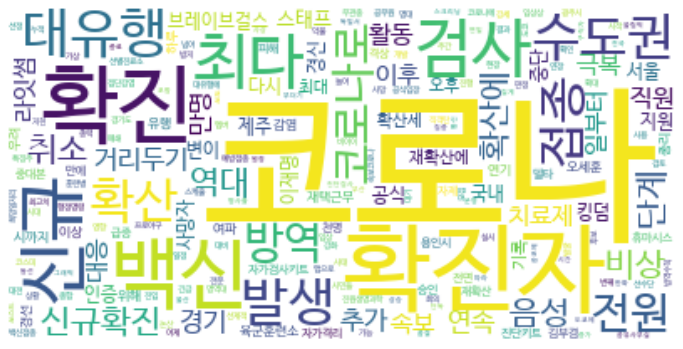

In [53]:
# wordcloud_image = WordCloud().generate(df['title'].values)

plt.figure(figsize=(12,8))
wc = WordCloud(
    font_path="/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf", 
    background_color='white'
)
# title = df['title']
wordcloud_image = wc.generate_from_frequencies(freq_df["count"])

plt.imshow(wordcloud_image, interpolation='bilinear')
plt.axis('off')
plt.show()